In [ ]:
import pandas as pd
import numpy as np
import data_clean_utils
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, MinMaxScaler,PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
import missingno as msno

In [ ]:
from sklearn import set_config

set_config(transform_output="pandas")

In [ ]:
#load the data
df= pd.read_csv("/content/zomato_dataset.csv")

In [ ]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,time_taken,Time_Converted
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,21:55
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,14:55
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,17:30
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,9:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,9:20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19:50


### Cleaning

In [ ]:
df=data_clean_utils.perform_data_cleaning(df)

In [ ]:
df

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather_conditions,traffic,...,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance,distance_type
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,Fog,Jam,...,DEH,12,2,saturday,1,15.0,21.0,night,10.280582,long
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,Stormy,High,...,KOC,13,2,sunday,1,10.0,14.0,afternoon,6.242319,medium
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,Sandstorms,Medium,...,PUNE,4,3,friday,0,10.0,17.0,afternoon,13.787860,long
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,Sandstorms,Low,...,LUDH,13,2,sunday,1,10.0,9.0,morning,2.930258,short
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,Fog,Jam,...,KNP,14,2,monday,0,15.0,19.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,Windy,High,...,JAP,24,3,thursday,0,10.0,11.0,morning,1.489846,short
45580,AGRRES16DEL01,21.0,4.6,NaN,NaN,NaN,NaN,2022-02-16,Windy,Jam,...,AGR,16,2,wednesday,0,15.0,19.0,evening,NaN,NaN
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,Cloudy,Low,...,CHEN,11,3,friday,0,15.0,23.0,night,4.657195,short
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,Cloudy,High,...,COIMB,7,3,monday,0,5.0,13.0,afternoon,6.232393,medium


In [ ]:
df.isna().sum()

,0
rider_id,0
age,1854
ratings,1908
restaurant_latitude,3637
restaurant_longitude,3637
delivery_latitude,3637
delivery_longitude,3637
order_date,0
weather_conditions,578
traffic,563


In [ ]:
#drop columns not required for model input
columns_to_drop =  ['rider_id',
                    'restaurant_latitude',
                    'restaurant_longitude',
                    'delivery_latitude',
                    'delivery_longitude',
                    'order_date',
                    "order_time_hour",
                    "order_day"

                    ]


In [ ]:
df.drop(columns=columns_to_drop,inplace=True)

In [ ]:
df

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,time_taken,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,DEH,2,saturday,1,15.0,night,10.280582,long
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,KOC,2,sunday,1,10.0,afternoon,6.242319,medium
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,PUNE,3,friday,0,10.0,afternoon,13.787860,long
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,LUDH,2,sunday,1,10.0,morning,2.930258,short
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,KNP,2,monday,0,15.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32,JAP,3,thursday,0,10.0,morning,1.489846,short
45580,21.0,4.6,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36,AGR,2,wednesday,0,15.0,evening,NaN,NaN
45581,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16,CHEN,3,friday,0,15.0,night,4.657195,short
45582,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26,COIMB,3,monday,0,5.0,afternoon,6.232393,medium


In [ ]:
#check for missing values
df.isna().sum()

,0
age,1854
ratings,1908
weather_conditions,578
traffic,563
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,993
festival,228
city_type,1200


In [ ]:
#check for duplicates
df.duplicated().sum()

np.int64(0)

<Axes: >

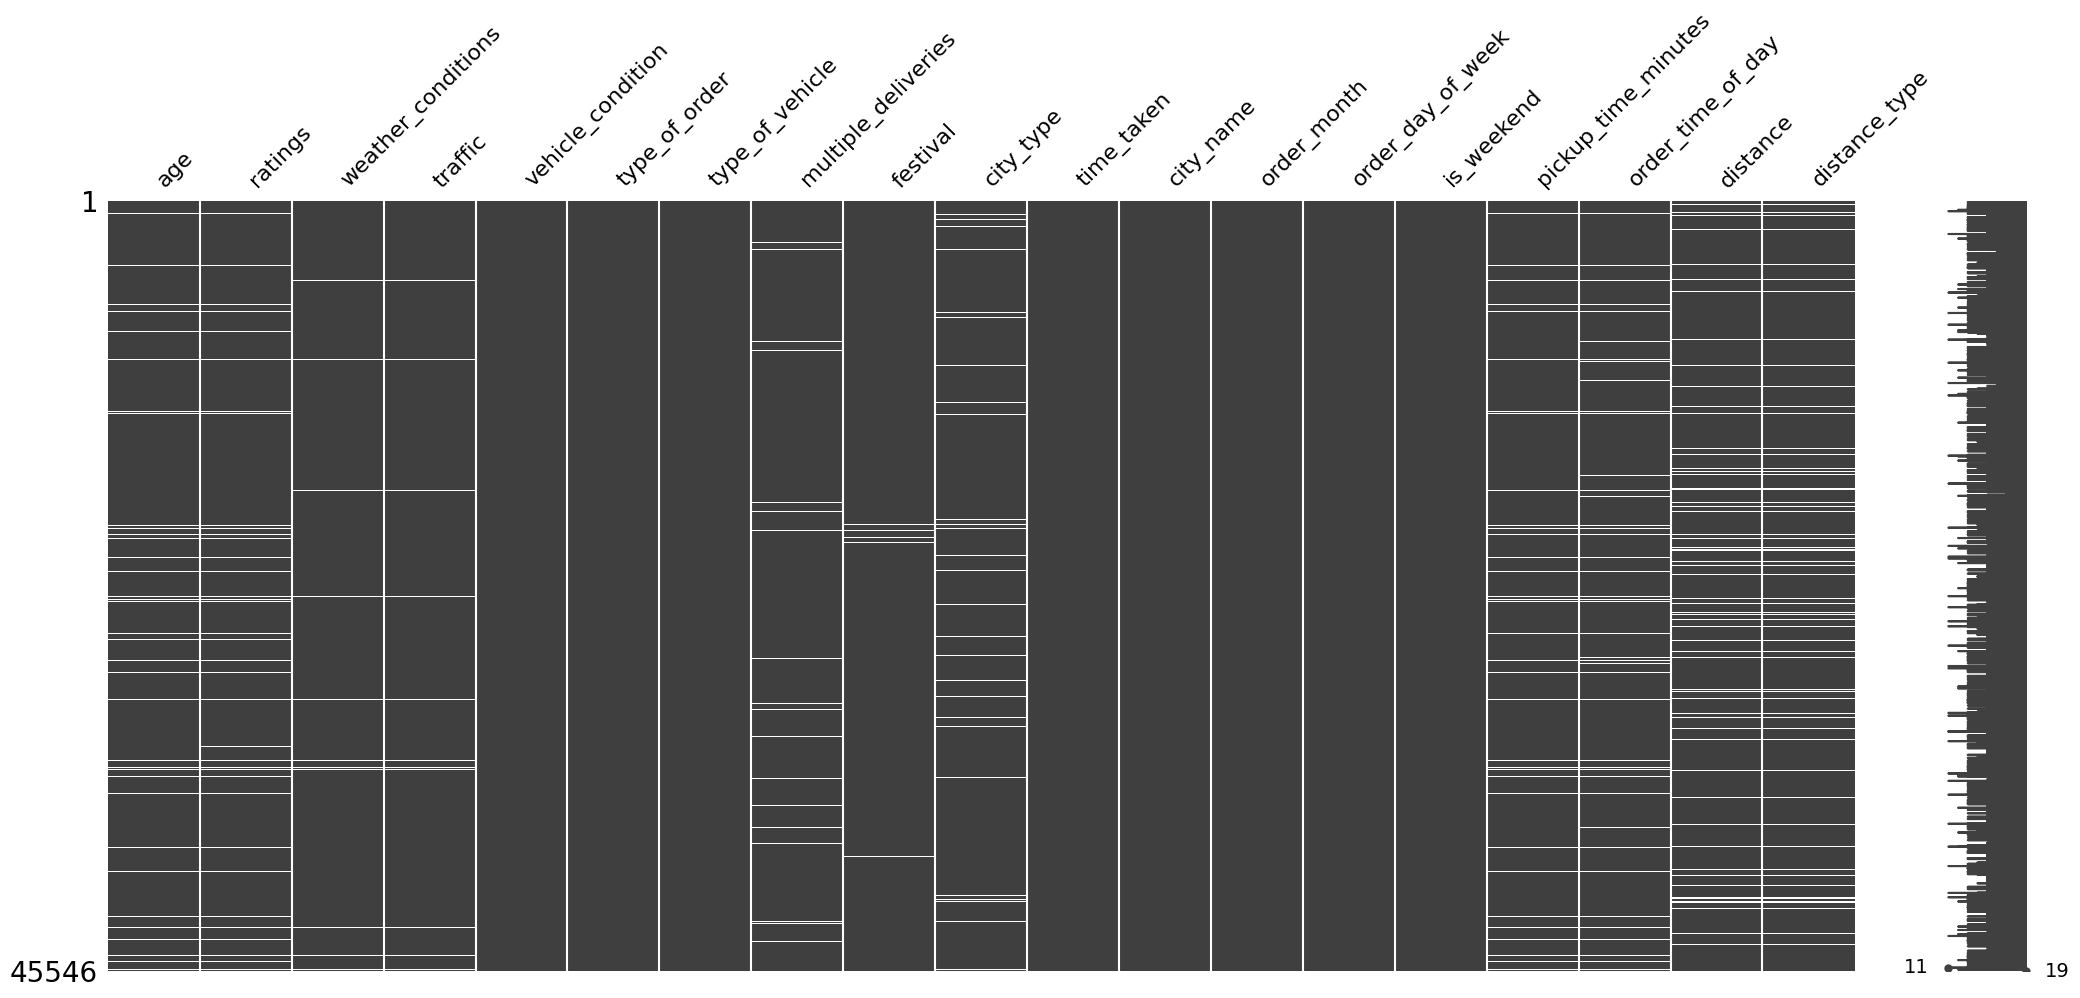

In [ ]:
msno.matrix(df)

In [ ]:
#columns that have missing values
missing_cols= (
      df
      .isna()
      .any(axis=0)
      .loc[lambda x:x]
      .index
)
missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

### Data Prep

In [ ]:
temp_df=df.copy().dropna()

In [ ]:
#split into x and y
X = temp_df.drop(columns='time_taken')
y = temp_df['time_taken']
X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,DEH,2,saturday,1,15.0,night,10.280582,long
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,KOC,2,sunday,1,10.0,afternoon,6.242319,medium
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,PUNE,3,friday,0,10.0,afternoon,13.787860,long
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,LUDH,2,sunday,1,10.0,morning,2.930258,short
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,KNP,2,monday,0,15.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45578,35.0,4.2,Windy,Jam,2,Drinks,motorcycle,1.0,No,Metropolitian,RANCHI,3,tuesday,0,10.0,night,16.600272,very_long
45579,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,JAP,3,thursday,0,10.0,morning,1.489846,short
45581,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,CHEN,3,friday,0,15.0,night,4.657195,short
45582,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,COIMB,3,monday,0,5.0,afternoon,6.232393,medium


In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (30148, 18)
The shape of test data is (7538, 18)


In [ ]:
# missing values in train data

X_train.isna().sum()

,0
age,0
ratings,0
weather_conditions,0
traffic,0
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,0
festival,0
city_type,0


In [ ]:
X_train.columns

Index(['age', 'ratings', 'weather_conditions', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'city_name', 'order_month', 'order_day_of_week',
       'is_weekend', 'pickup_time_minutes', 'order_time_of_day', 'distance',
       'distance_type'],
      dtype='object')

In [ ]:
len(X_train.columns)

18

In [ ]:
#preprocessing
num_cols=["age","ratings","pickup_time_minutes","distance"]
nominal_cat_cols=['weather_conditions','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","city_name","order_month",
                    "order_day_of_week",
                    "is_weekend",
                    "order_time_of_day"]
ordinal_cat_cols = ["traffic","distance_type"]


In [ ]:
len(num_cols +nominal_cat_cols+ordinal_cat_cols)

16

In [ ]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [ ]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor.set_output(transform="pandas")

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'city_name', 'order_month',
                                  'order_day_of_week', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
#Transform the data

X_train_trans= preprocessor.fit_transform(X_train)
X_test_trans= preprocessor.transform(X_test)

X_train_trans

,age,ratings,pickup_time_minutes,distance,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,type_of_order_Drinks,...,order_day_of_week_tuesday,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_evening,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,vehicle_condition,multiple_deliveries
35006,0.736842,0.96,0.083333,0.548387,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,2.0,0,0.0
39085,0.368421,0.64,0.083333,0.244420,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-1.0,1.0,2,1.0
18288,0.684211,0.88,0.916667,0.080785,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,0.0,1,0.0
35185,0.368421,0.88,0.083333,0.482761,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,-1.0,2.0,2,1.0
1179,0.000000,0.92,0.083333,0.163701,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20277,0.631579,0.96,0.083333,0.937993,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,3.0,0,0.0
7602,0.473684,0.96,0.500000,0.243232,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,1.0,1,1.0
13633,0.000000,1.00,0.500000,0.300458,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,1.0,0,0.0
1049,0.000000,0.84,0.083333,0.482007,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,-1.0,2.0,0,1.0


In [ ]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
y_train_pt

,x0
0,-0.653749
1,0.743848
2,-1.201202
3,-1.351480
4,-0.528116
...,...
30143,1.428928
30144,-1.672266
30145,-1.056791
30146,0.458769


array([0.32353761])

### Train Initial Baseline Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

lr.fit(X_train_trans, y_train_pt)

LinearRegression()

In [ ]:
#get the predictions
y_pred_train=lr.predict(X_train_trans)
y_pred_test= lr.predict(X_test_trans)

In [ ]:
# get actual predictions values

y_pred_train_org= pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org= pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 5.06 minutes
The test error is 5.07 minutes


In [ ]:
print(f"The train error is {r2_score(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {r2_score(y_test,y_pred_test_org):.2f} minutes")

The train error is 0.53 minutes
The test error is 0.52 minutes


### Impute Missing Values

In [ ]:
temp_df= df.copy()

In [ ]:
#split into x and y
X= temp_df.drop(columns="time_taken")
y= temp_df['time_taken']

X

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
0,36.0,4.2,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,DEH,2,saturday,1,15.0,night,10.280582,long
1,21.0,4.7,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,KOC,2,sunday,1,10.0,afternoon,6.242319,medium
2,23.0,4.7,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,PUNE,3,friday,0,10.0,afternoon,13.787860,long
3,34.0,4.3,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,LUDH,2,sunday,1,10.0,morning,2.930258,short
4,24.0,4.7,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,KNP,2,monday,0,15.0,evening,19.396618,very_long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,30.0,4.8,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,JAP,3,thursday,0,10.0,morning,1.489846,short
45580,21.0,4.6,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,AGR,2,wednesday,0,15.0,evening,NaN,NaN
45581,30.0,4.9,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,CHEN,3,friday,0,15.0,night,4.657195,short
45582,20.0,4.7,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,COIMB,3,monday,0,5.0,afternoon,6.232393,medium


In [ ]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print("The size of train data is",X_train.shape)
print("The shape of test data is",X_test.shape)

The size of train data is (36436, 18)
The shape of test data is (9110, 18)


In [ ]:
#missing values in train data
X_train.isna().sum()


,0
age,1496
ratings,1538
weather_conditions,462
traffic,450
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,792
festival,183
city_type,943


In [ ]:
# transform target column

pt = PowerTransformer()

y_train_pt = pt.fit_transform(y_train.values.reshape(-1,1))
y_test_pt = pt.transform(y_test.values.reshape(-1,1))

In [ ]:
missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

In [ ]:
# percentage of rows in data having missing values

(
    X_train
    .isna()
    .any(axis=1)
    .mean()
    .round(2) * 100
)

np.float64(17.0)

### Age

In [ ]:
X_train['age'].describe()

,age
count,34940.000000
mean,29.576159
std,5.799813
min,20.000000
25%,25.000000
50%,30.000000
75%,35.000000
max,50.000000


In [ ]:
#missing values in the column
X_train['age'].isna().sum()


np.int64(1496)

In [ ]:
#median value
age_median= X_train['age'].median()

**Age and Median values are similar, filling the age column with median value**

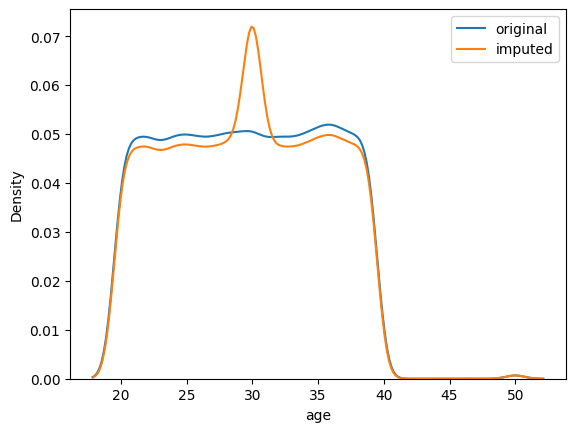

In [ ]:
#plot the kde plot

sns.kdeplot(X_train['age'],label="original")
sns.kdeplot(X_train['age'].fillna(age_median),label="imputed")
plt.legend()



1.   Changed the distribution of the age column
2.   use advanced imputation techniques like KNN imputer



### Ratings

In [ ]:
# statistical summary

X_train['ratings'].describe()

,ratings
count,34898.000000
mean,4.637965
std,0.315277
min,2.500000
25%,4.500000
50%,4.700000
75%,4.900000
max,6.000000


In [ ]:
#missing values
X_train['ratings'].isna().sum()

np.int64(1538)

In [ ]:
#avg ratings
ratings_mean=X_train['ratings'].mean()

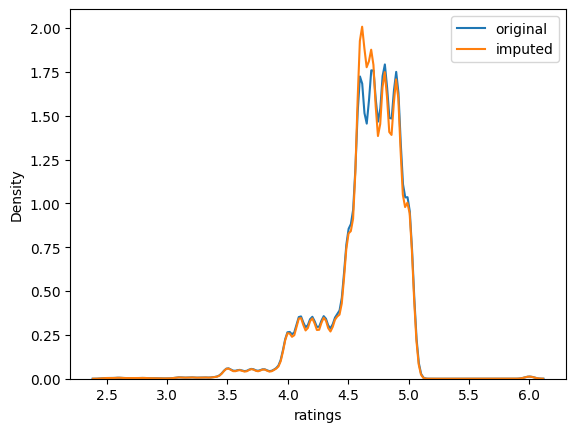

In [ ]:
sns.kdeplot(X_train['ratings'],label="original")
sns.kdeplot(X_train['ratings'].fillna(ratings_mean),label="imputed")
plt.legend()

### Weather


In [ ]:
#value counts
X_train['weather_conditions'].value_counts()


,count
weather_conditions,
Fog,6095
Stormy,6037
Cloudy,6022
Sandstorms,5994
Windy,5977
Sunny,5849


In [ ]:
#missing values in the column

X_train['weather_conditions'].isna().sum()

np.int64(462)

<Axes: xlabel='count', ylabel='weather_conditions'>

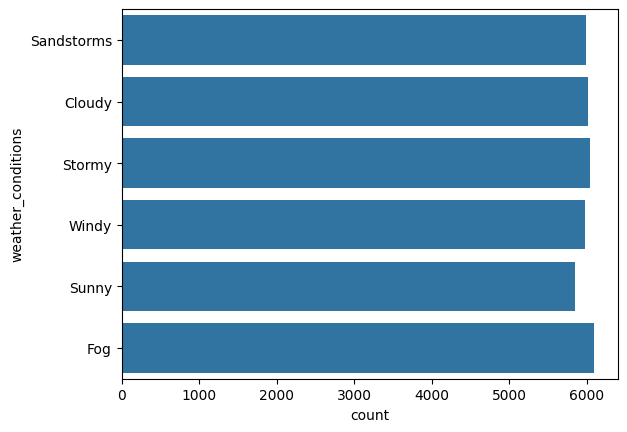

In [ ]:
#count plot
sns.countplot(X_train['weather_conditions'])

**No dominant category to impute from**

In [ ]:
missing_weather = MissingIndicator()
missing_weather.set_output(transform="pandas")

pd.concat([X_train['weather_conditions'],missing_weather.fit_transform(X_train[['weather_conditions']])],axis=1).sample(50)

,weather_conditions,missingindicator_weather_conditions
6229,Stormy,False
19674,Cloudy,False
28880,Fog,False
7864,Stormy,False
7069,Stormy,False
22955,Cloudy,False
36430,Fog,False
6771,Cloudy,False
5467,Sunny,False
3277,Cloudy,False


### Traffic

In [ ]:
# value counts

X_train['traffic'].value_counts()

,count
traffic,
Low,12373
Jam,11250
Medium,8771
High,3592


In [ ]:
# Missing values in column

X_train['traffic'].isna().sum()

np.int64(450)

<Axes: xlabel='count', ylabel='traffic'>

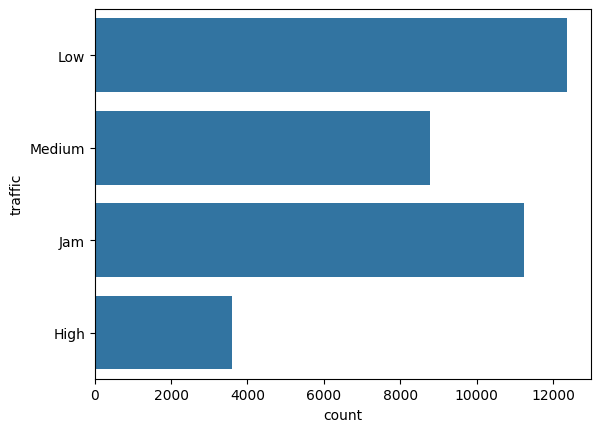

In [ ]:
# countplot

sns.countplot(X_train['traffic'])

**No Dominant Category**

### Multiple Categories

In [ ]:
# value counts

X_train['multiple_deliveries'].value_counts()

,count
multiple_deliveries,
1.0,22516
0.0,11273
2.0,1567
3.0,288


<Axes: xlabel='count', ylabel='multiple_deliveries'>

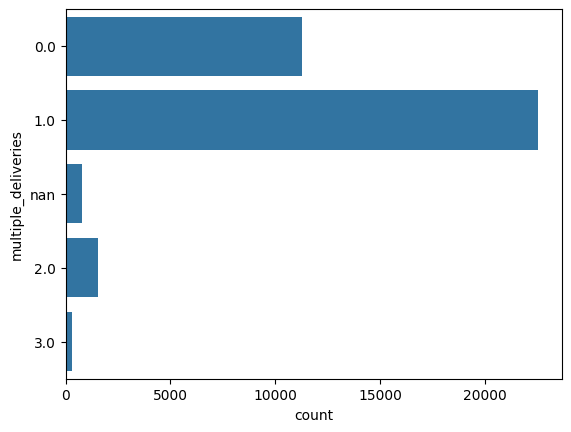

In [ ]:
# countplot

sns.countplot(X_train['multiple_deliveries'].apply(str))

In [ ]:
# number of missing values

X_train['multiple_deliveries'].isna().sum()

np.int64(792)

In [ ]:
# mode value

multiple_deliveries_mode = X_train['multiple_deliveries'].mode()[0]

<Axes: xlabel='count', ylabel='multiple_deliveries'>

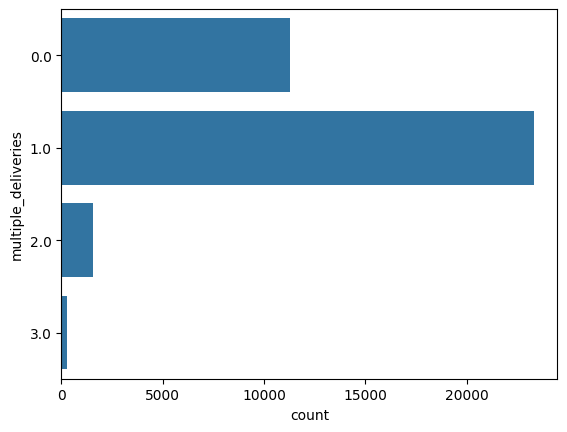

In [ ]:
# fill na values with mode

sns.countplot(X_train['multiple_deliveries'].fillna(multiple_deliveries_mode).apply(str))

**Mode can be used for this column as an imputation techniques**

### Festival

In [ ]:
# value counts
X_train['festival'].value_counts()

,count
festival,
No,35554
Yes,699


<Axes: xlabel='count', ylabel='festival'>

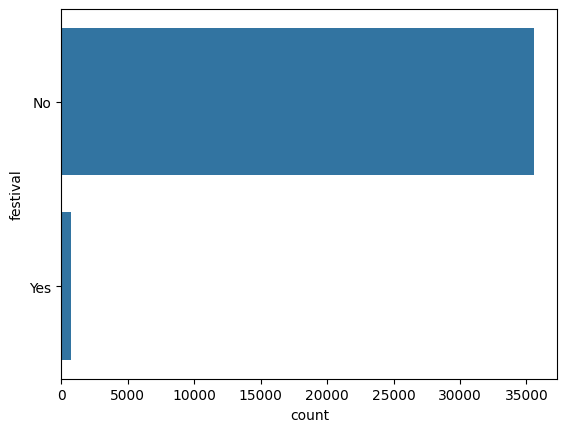

In [ ]:
# countplot

sns.countplot(X_train['festival'])

In [ ]:
# missing values in column

X_train['festival'].isna().sum()

np.int64(183)

In [ ]:
# mode value

festival_mode = X_train['festival'].mode()[0]

<Axes: xlabel='count', ylabel='festival'>

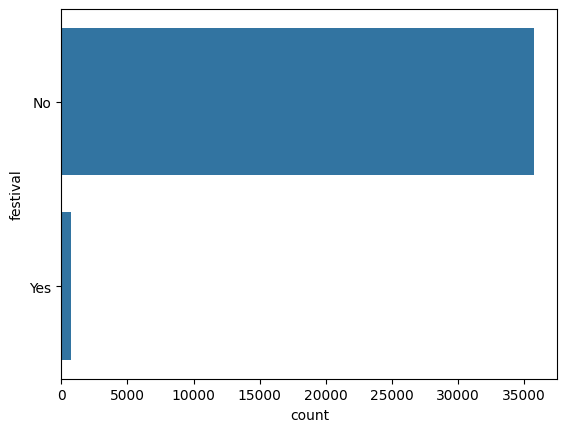

In [ ]:
# fill with mode

sns.countplot(X_train['festival'].fillna(festival_mode))

### City Type


In [ ]:
# value counts

X_train['city_type'].value_counts()

,count
city_type,
Metropolitian,27238
Urban,8126
Semi-Urban,129


In [ ]:
# number of missing values

X_train['city_type'].isna().sum()

np.int64(943)

<Axes: xlabel='count', ylabel='city_type'>

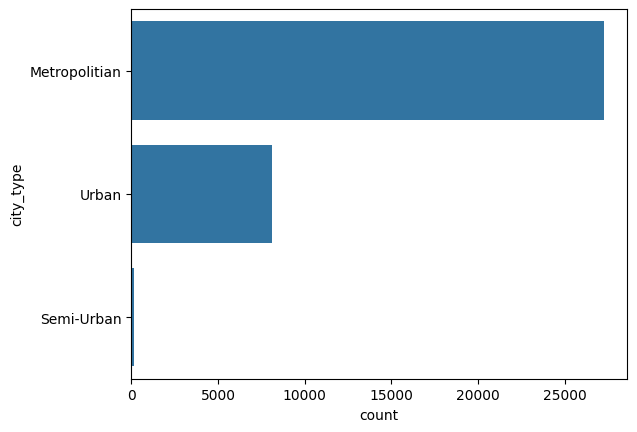

In [ ]:
# countplot

sns.countplot(X_train['city_type'])

In [ ]:
# mode value

city_type_mode = X_train['city_type'].mode()[0]

<Axes: xlabel='count', ylabel='city_type'>

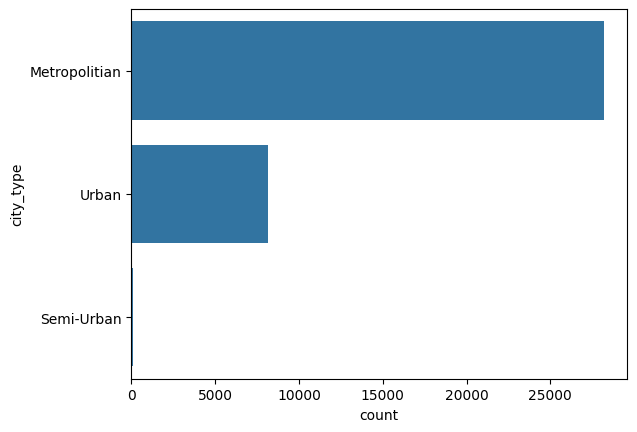

In [ ]:
# fill with mode

sns.countplot(X_train['city_type'].fillna(city_type_mode))

In [ ]:
missing_cols

Index(['age', 'ratings', 'weather_conditions', 'traffic',
       'multiple_deliveries', 'festival', 'city_type', 'pickup_time_minutes',
       'order_time_of_day', 'distance', 'distance_type'],
      dtype='object')

### Pickup Time

In [ ]:
# statistical summary

X_train['pickup_time_minutes'].describe()

,pickup_time_minutes
count,35077.000000
mean,9.983864
std,4.093651
min,4.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,16.000000


In [ ]:
# missing values in the column

X_train['pickup_time_minutes'].isna().sum()

np.int64(1359)

In [ ]:
# median value

pickup_time_minutes_median = X_train['pickup_time_minutes'].median()

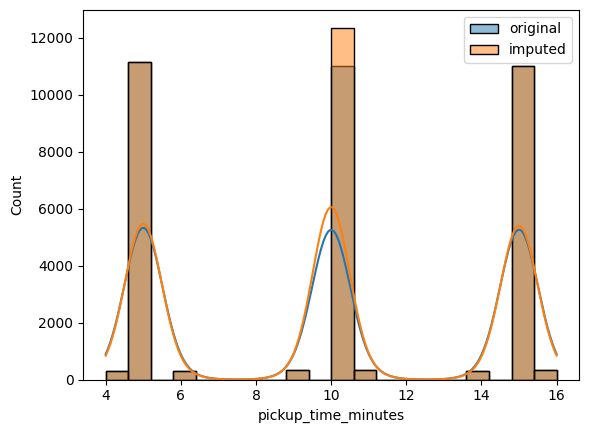

In [ ]:
# histplot

sns.histplot(X_train['pickup_time_minutes'],kde=True,label='original')
sns.histplot(X_train['pickup_time_minutes'].fillna(pickup_time_minutes_median),kde=True,label='imputed')
plt.legend()

### Order of the Day

In [ ]:
# value counts

X_train['order_time_of_day'].value_counts()

,count
order_time_of_day,
night,10962
evening,10898
morning,6913
afternoon,5968
after_midnight,0


In [ ]:
# missing values

X_train['order_time_of_day'].isna().sum()

np.int64(1695)

<Axes: xlabel='count', ylabel='order_time_of_day'>

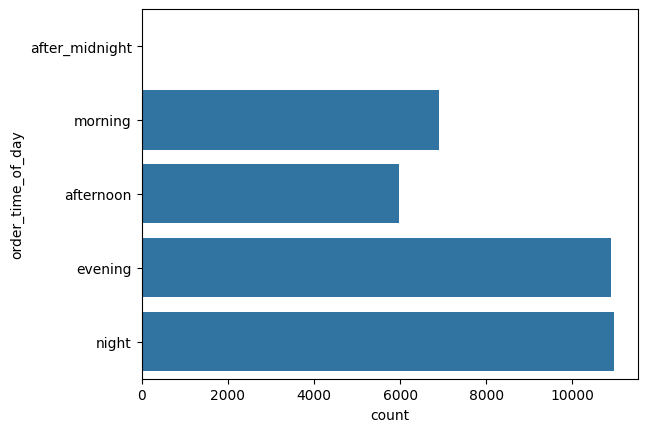

In [ ]:
# countplot

sns.countplot(X_train['order_time_of_day'])

In [ ]:
# rows where the data is missing

X_train[X_train['order_time_of_day'].isna()]

,age,ratings,weather_conditions,traffic,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city_type,city_name,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_of_day,distance,distance_type
27528,NaN,NaN,Sunny,Low,0,Meal,motorcycle,1.0,No,NaN,KOC,2,monday,0,NaN,NaN,10.924097,long
8471,NaN,NaN,Sandstorms,Low,1,Snack,scooter,1.0,No,Urban,SUR,3,wednesday,0,NaN,NaN,3.040667,short
4205,NaN,NaN,NaN,NaN,3,Snack,scooter,1.0,No,Metropolitian,VAD,3,thursday,0,NaN,NaN,10.602504,long
30254,NaN,NaN,Sandstorms,Jam,0,Drinks,motorcycle,1.0,No,Metropolitian,VAD,3,thursday,0,NaN,NaN,NaN,NaN
6875,NaN,NaN,Stormy,Jam,2,Meal,motorcycle,1.0,No,Metropolitian,RANCHI,3,friday,0,NaN,NaN,4.528165,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39538,NaN,NaN,NaN,NaN,3,Snack,electric_scooter,1.0,No,Metropolitian,COIMB,3,friday,0,NaN,NaN,6.232190,medium
21256,26.0,4.8,Cloudy,Low,2,Snack,motorcycle,0.0,No,Urban,BANG,3,sunday,1,10.0,NaN,7.762500,medium
21284,NaN,NaN,Stormy,Jam,1,Meal,motorcycle,1.0,No,Metropolitian,JAP,3,thursday,0,NaN,NaN,20.851557,very_long
3946,NaN,NaN,NaN,NaN,3,Drinks,bicycle,1.0,No,Metropolitian,CHEN,4,saturday,1,NaN,NaN,20.178101,very_long


### Distance

In [ ]:
# statistical summary

X_train['distance'].describe()

,distance
count,33493.000000
mean,9.704505
std,5.607177
min,1.465067
25%,4.657652
50%,9.192496
75%,13.631449
max,20.969489


In [ ]:
# number of missing values

X_train['distance'].isna().sum()

np.int64(2943)

In [ ]:
# avg distance

distance_mean = X_train['distance'].mean()

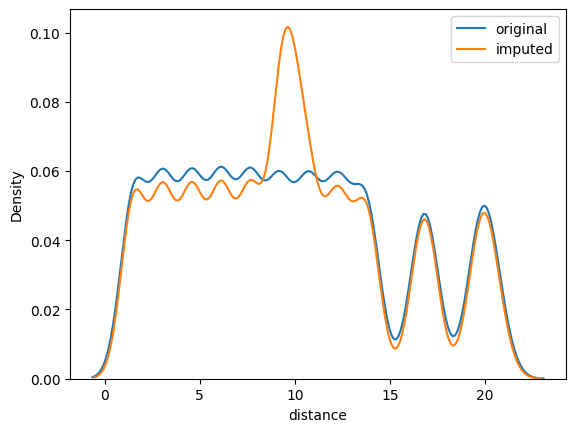

In [ ]:
# kdeplot

sns.kdeplot(X_train['distance'],label='original')
sns.kdeplot(X_train['distance'].fillna(distance_mean),label='imputed')
plt.legend()

### Distance Type

In [ ]:
X_train['distance_type'].value_counts()

,count
distance_type,
medium,9065
short,9055
long,8951
very_long,6422


In [ ]:
# missing values

X_train['distance_type'].isna().sum()

np.int64(2943)

<Axes: xlabel='count', ylabel='distance_type'>

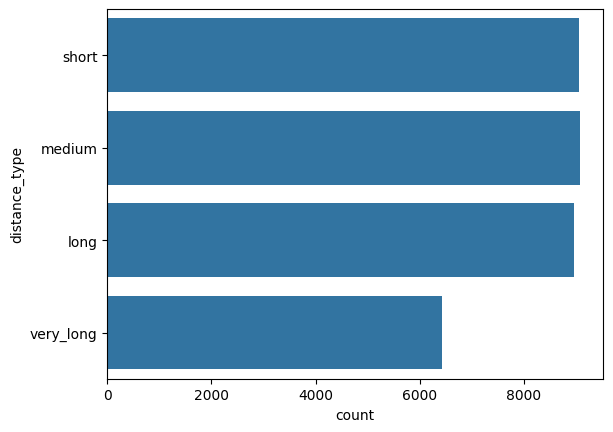

In [ ]:
# countplot

sns.countplot(X_train['distance_type'])

**mode cannot be used**

### Imputation Pipeline

In [ ]:
nominal_cat_cols

['weather_conditions',
 'type_of_order',
 'type_of_vehicle',
 'festival',
 'city_type',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_of_day']

In [ ]:
X_train.isna().sum()

,0
age,1496
ratings,1538
weather_conditions,462
traffic,450
vehicle_condition,0
type_of_order,0
type_of_vehicle,0
multiple_deliveries,792
festival,183
city_type,943


In [ ]:
# features to fill values with mode

features_to_fill_mode = ['multiple_deliveries','festival','city_type']
features_to_fill_missing = [col for col in nominal_cat_cols if col not in features_to_fill_mode]

features_to_fill_missing

['weather_conditions',
 'type_of_order',
 'type_of_vehicle',
 'city_name',
 'order_month',
 'order_day_of_week',
 'is_weekend',
 'order_time_of_day']

In [ ]:
# simple imputer to fill categorical vars with mode

simple_imputer = ColumnTransformer(transformers=[
    ("mode_imputer",SimpleImputer(strategy="most_frequent"),features_to_fill_mode),
    ("missing_imputer",SimpleImputer(strategy="constant",fill_value="missing"),features_to_fill_missing)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)

simple_imputer

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('mode_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['multiple_deliveries', 'festival',
                                  'city_type']),
                                ('missing_imputer',
                                 SimpleImputer(fill_value='missing',
                                               strategy='constant'),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'city_name', 'order_month',
                                  'order_day_of_week', 'is_weekend',
                                  'order_time_of_day'])],
                  verbose_feature_names_out=False)

In [ ]:
simple_imputer.fit_transform(X_train)

,multiple_deliveries,festival,city_type,weather_conditions,type_of_order,type_of_vehicle,city_name,order_month,order_day_of_week,is_weekend,order_time_of_day,age,ratings,traffic,vehicle_condition,pickup_time_minutes,distance,distance_type
40699,0.0,No,Metropolitian,Sandstorms,Snack,scooter,KOC,2,friday,0,night,37.0,5.0,Low,1,5.0,12.483922,long
11911,1.0,No,Metropolitian,Cloudy,Buffet,scooter,CHEN,3,sunday,1,evening,34.0,4.6,Medium,2,5.0,9.313692,medium
2409,1.0,No,Urban,Cloudy,Meal,scooter,MUM,3,saturday,1,morning,30.0,4.7,Low,2,10.0,3.058925,short
38039,1.0,No,Metropolitian,Stormy,Snack,scooter,GOA,2,monday,0,night,21.0,4.5,Low,1,15.0,16.982277,very_long
342,1.0,No,Metropolitian,Windy,Meal,electric_scooter,INDO,3,tuesday,0,afternoon,33.0,3.9,Medium,2,5.0,13.612594,long
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,1.0,No,Metropolitian,Cloudy,Meal,electric_scooter,RANCHI,4,tuesday,0,evening,35.0,4.8,Medium,2,10.0,NaN,NaN
44769,1.0,No,Urban,Sunny,Drinks,scooter,RANCHI,3,wednesday,0,night,28.0,4.8,Jam,1,5.0,4.528282,short
38190,1.0,No,Urban,Sunny,Buffet,motorcycle,HYD,3,sunday,1,morning,27.0,4.7,Low,0,5.0,1.536864,short
860,1.0,No,Metropolitian,Stormy,Buffet,motorcycle,MUM,3,sunday,1,afternoon,27.0,4.4,Medium,0,5.0,10.707860,long


In [ ]:
simple_imputer.fit_transform(X_train).isna().sum()

,0
multiple_deliveries,0
festival,0
city_type,0
weather_conditions,0
type_of_order,0
type_of_vehicle,0
city_name,0
order_month,0
order_day_of_week,0
is_weekend,0


In [ ]:
# knn imputer

knn_imputer = KNNImputer(n_neighbors=5)

In [ ]:
# do basic preprocessing

num_cols = ["age","ratings","pickup_time_minutes","distance"]

nominal_cat_cols = ['weather_conditions','type_of_order',
                    'type_of_vehicle',"festival",
                    "city_type","city_name","order_month",
                    "order_day_of_week",
                    "is_weekend",
                    "order_time_of_day"]

ordinal_cat_cols = ["traffic","distance_type"]

In [ ]:
# generate order for ordinal encoding

traffic_order = ["low","medium","high","jam"]

distance_type_order = ["short","medium","long","very_long"]

In [ ]:
# unique categories the ordinal columns

for col in ordinal_cat_cols:
    print(col,X_train[col].unique())

traffic ['Low' 'Medium' 'Jam' 'High' nan]
distance_type ['long', 'medium', 'short', 'very_long', NaN]
Categories (4, object): ['short' < 'medium' < 'long' < 'very_long']


In [ ]:
# build a preprocessor

preprocessor = ColumnTransformer(transformers=[
    ("scale", MinMaxScaler(), num_cols),
    ("nominal_encode", OneHotEncoder(drop="first",handle_unknown="ignore",
                                     sparse_output=False), nominal_cat_cols),
    ("ordinal_encode", OrdinalEncoder(categories=[traffic_order,distance_type_order],
                                      encoded_missing_value=-999,
                                      handle_unknown="use_encoded_value",
                                      unknown_value=-1), ordinal_cat_cols)
],remainder="passthrough",n_jobs=-1,force_int_remainder_cols=False,verbose_feature_names_out=False)


preprocessor

ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                  remainder='passthrough',
                  transformers=[('scale', MinMaxScaler(),
                                 ['age', 'ratings', 'pickup_time_minutes',
                                  'distance']),
                                ('nominal_encode',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore',
                                               sparse_output=False),
                                 ['weather_conditions', 'type_of_order',
                                  'type_of_vehicle', 'festival', 'city_type',
                                  'city_name', 'order_month',
                                  'order_day_of_week', 'is_weekend',
                                  'order_time_of_day']),
                                ('ordinal_encode',
                                 OrdinalEncoder(categories=[['low', 'medium',
                                                             'high', 'jam'],
                                                            ['short', 'medium',
                                                             'long',
                                                             'very_long']],
                                                encoded_missing_value=-999,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['traffic', 'distance_type'])],
                  verbose_feature_names_out=False)

In [ ]:
preprocessor.fit_transform(X_train)['distance_type'].value_counts()

,count
distance_type,
1.0,9065
0.0,9055
2.0,8951
3.0,6422
-1.0,2943


In [ ]:
preprocessor.fit_transform(X_train).isna().sum().loc[lambda ser : ser.ge(1)]

,0
age,1496
ratings,1538
pickup_time_minutes,1359
distance,2943
multiple_deliveries,792


In [ ]:
# build the pipeline

processing_pipeline = Pipeline(steps=[
                                ("simple_imputer",simple_imputer),
                                ("preprocess",preprocessor),
                                ("knn_imputer",knn_imputer)
                            ])

processing_pipeline

Pipeline(steps=[('simple_imputer',
                 ColumnTransformer(force_int_remainder_cols=False, n_jobs=-1,
                                   remainder='passthrough',
                                   transformers=[('mode_imputer',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['multiple_deliveries',
                                                   'festival', 'city_type']),
                                                 ('missing_imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant'),
                                                  ['weather_conditions',
                                                   'type_of_order',
                                                   't...
                                                   'city_name', 'order_month',
                                                   'order_day_of_week',
                                                   'is_weekend',
                                                   'order_time_of_day']),
                                                 ('ordinal_encode',
                                                  OrdinalEncoder(categories=[['low',
                                                                              'medium',
                                                                              'high',
                                                                              'jam'],
                                                                             ['short',
                                                                              'medium',
                                                                              'long',
                                                                              'very_long']],
                                                                 encoded_missing_value=-999,
                                                                 handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['traffic',
                                                   'distance_type'])],
                                   verbose_feature_names_out=False)),
                ('knn_imputer', KNNImputer())])

In [ ]:
# fit and transform the pipeline on X_train

processing_pipeline.fit_transform(X_train)

,age,ratings,pickup_time_minutes,distance,weather_conditions_Fog,weather_conditions_Sandstorms,weather_conditions_Stormy,weather_conditions_Sunny,weather_conditions_Windy,weather_conditions_missing,...,order_day_of_week_wednesday,is_weekend_1,order_time_of_day_evening,order_time_of_day_missing,order_time_of_day_morning,order_time_of_day_night,traffic,distance_type,multiple_deliveries,vehicle_condition
40699,0.566667,0.714286,0.083333,0.564941,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,2.0,0.0,1.0
11911,0.466667,0.600000,0.083333,0.402402,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,-1.0,1.0,1.0,2.0
2409,0.333333,0.628571,0.500000,0.081718,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,2.0
38039,0.033333,0.571429,0.916667,0.795574,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,3.0,1.0,1.0
342,0.433333,0.400000,0.083333,0.622809,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,2.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11291,0.500000,0.657143,0.500000,0.159127,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,2.0
44769,0.266667,0.657143,0.083333,0.157052,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,1.0,1.0
38190,0.233333,0.628571,0.083333,0.003681,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,1.0,0.0
860,0.233333,0.542857,0.083333,0.473882,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-1.0,2.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",lr)
                            ])

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [ ]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt)

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                    'is_weekend',
                                                                    'order_time_of_day']),
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', LinearRegression())])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [ ]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 5.20 minutes
The test error is 5.20 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.51
The test r2 score is 0.52


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42,n_jobs=-1)

model_pipe = Pipeline(steps=[
                                ("preprocessing",processing_pipeline),
                                ("model",rf)
                            ])

model_pipe

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [ ]:
# fit the pipeline on data

model_pipe.fit(X_train,y_train_pt.values.ravel())

Pipeline(steps=[('preprocessing',
                 Pipeline(steps=[('simple_imputer',
                                  ColumnTransformer(force_int_remainder_cols=False,
                                                    n_jobs=-1,
                                                    remainder='passthrough',
                                                    transformers=[('mode_imputer',
                                                                   SimpleImputer(strategy='most_frequent'),
                                                                   ['multiple_deliveries',
                                                                    'festival',
                                                                    'city_type']),
                                                                  ('missing_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant'),
                                                                   ['weath...
                                                                  ('ordinal_encode',
                                                                   OrdinalEncoder(categories=[['low',
                                                                                               'medium',
                                                                                               'high',
                                                                                               'jam'],
                                                                                              ['short',
                                                                                               'medium',
                                                                                               'long',
                                                                                               'very_long']],
                                                                                  encoded_missing_value=-999,
                                                                                  handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1),
                                                                   ['traffic',
                                                                    'distance_type'])],
                                                    verbose_feature_names_out=False)),
                                 ('knn_imputer', KNNImputer())])),
                ('model', RandomForestRegressor(n_jobs=-1, random_state=42))])

In [ ]:
# get the predictions
y_pred_train = model_pipe.predict(X_train)
y_pred_test = model_pipe.predict(X_test)

In [ ]:
# get the actual predictions values

y_pred_train_org = pt.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = pt.inverse_transform(y_pred_test.reshape(-1,1))

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

print(f"The train error is {mean_absolute_error(y_train,y_pred_train_org):.2f} minutes")
print(f"The test error is {mean_absolute_error(y_test,y_pred_test_org):.2f} minutes")

The train error is 1.49 minutes
The test error is 3.97 minutes


In [ ]:
print(f"The train r2 score is {r2_score(y_train,y_pred_train_org):.2f}")
print(f"The test r2 score is {r2_score(y_test,y_pred_test_org):.2f}")

The train r2 score is 0.96
The test r2 score is 0.70
